# 1. Perkenalan

- Nama = Reza Muhammad Rhafi
- Batch = HCK-023
- Gambaran Dataset = dataset terdiri dari 14 kolom dengan 45000 entry. dataset mempresentasikan informasi tentang umur, gender, education, pengalaman kerja, kepemilikan rumah, jumlah yang ingin dipinjam, maksud dari peminjaman, kredit skor peminjam, dan apakah pernah gagal dalam membayar pinjaman sesuai tenggat waktu.
- Objective = saya adalah seorang data scientist di sebuah BANK, saya diminta untuk membuat sebuah model yang dapat memprediksi seseorang dapat menerima pinjaman sehingga orang yang ingin melakukan pengecekan apakah mereka dapat melakukan peminjaman atau tidak.

## Conceptual Problems

### Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging adalah teknik ensemble yang dikembangkan untuk mengatasi masalah performa model prediktif, khususnya untuk model yang memiliki masalah overfitting (seperti Decision Tree) atau model yang kurang stabil. cara kerja dari bagging adalah melibatkan pelatihan beberapa model secara independen dan menggabungkan prediksi mereka melalui perataan atau pemungutan suara 

### Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Random Forest adalah algoritma yang menggunakan metode bagging, di mana ia membuat banyak Decision Tree independen dari subset data yang dihasilkan melalui bootstrapping, dan hasil akhir diperoleh dengan voting mayoritas (untuk klasifikasi) dari semua pohon. Sedangkan XGBoost menggunakan pendekatan boosting, di mana ia membangun pohon secara berurutan. Setiap pohon baru mencoba memperbaiki kesalahan pohon sebelumnya dengan meminimalkan fungsi loss melalui pengoptimalan gradien.

### Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation adalah teknik evaluasi model yang digunakan untuk menilai kemampuan generalisasi suatu model terhadap data baru dengan cara membagi data menjadi beberapa subset. Proses ini bertujuan untuk mengurangi overfitting atau underfitting dan memastikan model memiliki performa yang konsisten.

# 2. Import Libraries

In [68]:
# Data Manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from scipy import stats
from scipy.stats import kendalltau
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Loading

In [69]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [71]:
df.duplicated().sum()

np.int64(0)

- person_age (Float):
Usia seseorang dalam tahun, direpresentasikan dalam angka desimal. Misalnya, seseorang berusia 25.5 tahun.

- person_gender (Categorical):
Jenis kelamin individu, biasanya berupa kategori seperti "Male", "Female"

- person_education (Categorical):
Tingkat pendidikan tertinggi yang diraih oleh individu.

- person_income (Float):
Pendapatan tahunan individu dalam bentuk angka desimal.

- person_emp_exp (Integer):
Lama pengalaman kerja individu dalam tahun. Misalnya, 5 berarti individu tersebut memiliki pengalaman kerja selama 5 tahun.

- person_home_ownership (Categorical):
Status kepemilikan rumah, seperti "Rent" (menyewa), "Own" (memiliki), atau "Mortgage" (kredit rumah).

- loan_amnt (Float):
Jumlah pinjaman yang diminta oleh individu dalam bentuk angka desimal.

- loan_intent (Categorical):
Tujuan dari pinjaman yang diminta, seperti "Education" (pendidikan), "Business" (usaha), "Home Improvement" (perbaikan rumah), dan lain-lain.

- loan_int_rate (Float):
Suku bunga pinjaman.

- loan_percent_income (Float):
Rasio jumlah pinjaman terhadap pendapatan tahunan individu, dinyatakan sebagai persentase. Misalnya, 0.2 berarti pinjaman sebesar 20% dari pendapatan tahunan.

- cb_person_cred_hist_length (Float):
Panjang riwayat kredit individu dalam tahun. Misalnya, jika seseorang memiliki riwayat kredit selama 7.5 tahun, maka nilai ini adalah 7.5.

- credit_score (Integer):
Skor kredit individu yang mencerminkan kelayakan kredit mereka, biasanya berada pada rentang tertentu seperti 300-850.

- previous_loan_defaults_on_file (Categorical):
Indikator apakah individu pernah gagal bayar pinjaman sebelumnya, biasanya "Yes" (pernah) atau "No" (tidak pernah).

- loan_status (Categorical):
Status persetujuan pinjaman, di mana 1 menunjukkan pinjaman disetujui dan 0 menunjukkan pinjaman ditolak.

# 4. Exploratory Data Analysis (EDA)

## 1. berapa jumlah peminjaman yang sering diajukan oleh peminjam

<Axes: xlabel='loan_amnt', ylabel='Count'>

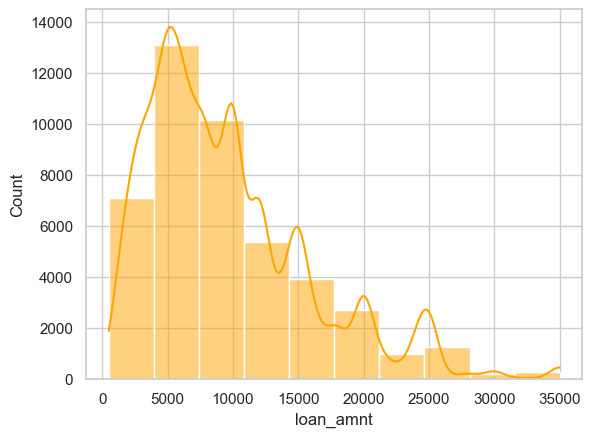

In [157]:
sns.histplot(df['loan_amnt'], bins=10, kde=True, color='orange')

berdasarkan plot, rata-rata orang akan meminta peminjaman dirange sebesar 5000 hingga 10000. sehingga jika seseorang ingin melakukan peminjaman, sebaiknya meminjam direntang 5000 hingga 10000

## 2. Direntang umur berapakah seseorang sering melakukan peminjaman

<Axes: xlabel='person_age', ylabel='Count'>

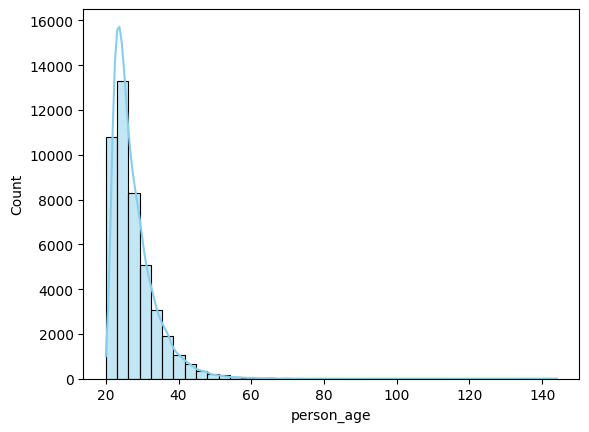

In [73]:
sns.histplot(df['person_age'], bins=40, kde=True, color='skyblue')

dari dataset, rata-rata orang yang ingin melakukan peminjaman berada diumur 20 hingga 30 tahun 

## 3. Bagaimana distribusi dari skor kredit peminjam

<Axes: xlabel='credit_score', ylabel='Count'>

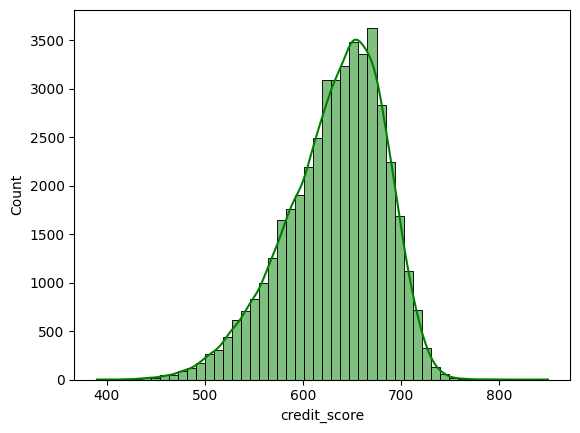

In [74]:
sns.histplot(df['credit_score'], bins=50, kde=True, color='green')

Skor kredit peminjaman adalah angka yang digunakan untuk menilai kelayakan kredit seseorang atau kemampuan individu untuk membayar kembali pinjaman. jika semakin tinggi nilai skor kredit seseorang maka dia melakukan pembayaran utang sebelumnya tepat waktu. berdasarkan chart, kebanyakan kredit skor peminjam berada disekitar 600 hingga 700 yang mana individu tersebut memiliki kelayakan kredit yang bagus.

## 4. apakah orang yang menyewa tempat tinggal lebih banyak yang ingin melakukan peminjaman daripada yang sudah memiliki rumah sendiri?  

C:\Users\Vexen\AppData\Local\Temp\ipykernel_7596\2795519465.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='person_home_ownership', data=df, palette='muted')


<Axes: xlabel='person_home_ownership', ylabel='count'>

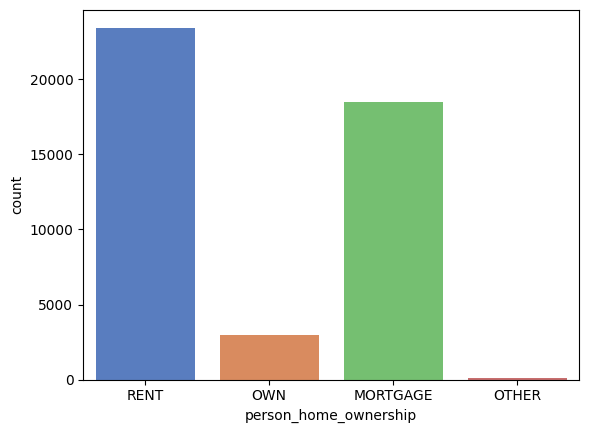

In [75]:
sns.countplot(x='person_home_ownership', data=df, palette='muted')

berdasarkan chart, kebanyakan orang yang ingin melakukan peminjaman adalah orang yang masih menyewa tempat tinggal dan kredit rumah.

## 5. Untuk tujuan apa kebanyakan orang akan melakukan peminjaman

C:\Users\Vexen\AppData\Local\Temp\ipykernel_7596\655651578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


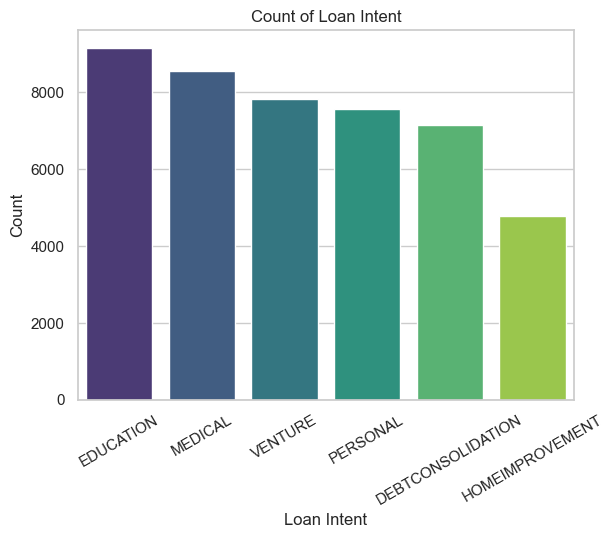

In [131]:
sns.countplot(
    data=df,            
    x='loan_intent',             
    order=df['loan_intent'].value_counts().index, 
    palette="viridis"              
)
plt.title("Count of Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.xticks(rotation=30)  # Atur rotasi label x-axis agar mudah dibaca
plt.show()

berdasarkan dataset, kebanyakan orang biasanya akan melakukan peminjaman untuk tujuan pendidikan dan kesehatan. pendidikan dan kesehatan merupakan 2 hal yang sangat penting sehingga orang-orang akan melakukan peminjaman apabila terdesak.

# 5. Feature Engineering

## Check Cardinality

In [76]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,person_gender,2,"[female, male]"
1,person_education,5,"[Master, High School, Bachelor, Associate, Doctorate]"
2,person_home_ownership,4,"[RENT, OWN, MORTGAGE, OTHER]"
3,loan_intent,6,"[PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION]"
4,previous_loan_defaults_on_file,2,"[No, Yes]"


berdasarkan cardinality dari feature categorical, tidak terdapat feature yang memiliki high cardinality. 

## Split X dan y

In [77]:
X = df.drop(['loan_status'], axis = 1)
y = df['loan_status']
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [78]:
y.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [79]:
# Splitting Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
y_train.value_counts()

loan_status
0    24500
1     7000
Name: count, dtype: int64

## Handling Outlier

In [80]:
#check distribution form skewness
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,person_age,2.4,skewed
1,person_income,35.6,skewed
2,person_emp_exp,2.5,skewed
3,loan_amnt,1.2,skewed
4,loan_int_rate,0.2,normal
5,loan_percent_income,1.1,skewed
6,cb_person_cred_hist_length,1.6,skewed
7,credit_score,-0.6,skewed


In [81]:
# Get upper, lower boundaries and percentage of outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #checking upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  #append to list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    #round the value
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,person_age,48.00,6.00,1.03
1,person_income,240013.25,-97512.75,1.60
2,person_emp_exp,29.00,-20.00,0.61
3,loan_amnt,34108.00,-16831.00,0.54
4,loan_int_rate,19.92,2.06,0.16
5,loan_percent_income,0.55,-0.29,0.04
6,cb_person_cred_hist_length,23.00,-12.00,0.37
7,credit_score,874.00,398.00,0.00


In [82]:
#compare with column stats
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
person_age,31500.0,27.75,6.03,20.00,24.00,26.00,30.00,144.00
person_income,31500.0,80259.78,81357.98,8000.00,47141.25,67048.50,95359.25,7200766.00
person_emp_exp,31500.0,5.40,6.05,0.00,1.00,4.00,8.00,125.00
loan_amnt,31500.0,9591.49,6325.07,500.00,5000.00,8000.00,12277.00,35000.00
loan_int_rate,31500.0,10.99,2.98,5.42,8.57,11.01,12.99,20.00
loan_percent_income,31500.0,0.14,0.09,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,31500.0,5.87,3.89,2.00,3.00,4.00,8.00,30.00
credit_score,31500.0,632.74,50.29,390.00,602.00,640.00,670.00,850.00


jika dilihat dari persentase outlier dari feature, outlier yang tertinggi yaitu 1.60% sehingga disini saya tidak akan melakukan handling outlier

## Missing Value

In [83]:
X_train.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
dtype: int64

In [84]:
X_test.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
dtype: int64

tidak terdapat missing value pada data maka tidak perlu dilakukan handling terhadap missing value 

## Split Between Numeric Columns and Categorical Columns

In [85]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [86]:
num_col = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
cat_ord = ['person_education']
cat_num = ['person_gender','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

## Feature Selection

In [ ]:


# Inisialisasi list untuk hasil
p_values = []
interpretasi = []
cols = cat_num   # Daftar nama kolom kategorikal

# Loop untuk menghitung p-value chi2 untuk setiap kolom kategorikal
for col in cols:
    # Encoding kategorikal ke numerik
    le = LabelEncoder()
    X_encoded = le.fit_transform(X_train[col])  # Mengubah menjadi array numerik

    # Menghitung chi2
    chi2_stat, p_value = chi2(X_encoded.reshape(-1, 1), y_train)  # Melakukan uji chi2

    # Menyimpan hasil
    p_values.append(p_value[0])  # Chi2 mengembalikan array, kita ambil nilai pertama
    if p_value[0] < 0.05:  # Bandingkan nilai pertama p-value
        interpretasi.append('ada korelasi')
    else:
        interpretasi.append('ga ada korelasi')

# Menampilkan hasil seleksi fitur
hasil = pd.DataFrame({'nama kolom': cols, 'p-value': p_values, 'hasil': interpretasi})
print(hasil)


                       nama kolom       p-value            hasil
0                   person_gender  6.349557e-01  ga ada korelasi
1           person_home_ownership  0.000000e+00     ada korelasi
2                     loan_intent  8.852158e-46     ada korelasi
3  previous_loan_defaults_on_file  0.000000e+00     ada korelasi


melihat korelasi category dengan target, semua featurenya memiliki korelasi kecuali gender seseorang. korelasi yang paling kuat adalah kepemilikan rumah dan histori apakah seseorang pernah gagal bayar peminjaman.

In [88]:
ordinal_mapping = {
    'person_education': ['High School', 'Associate', 'Bachelor','Master','Doctorate'],
}

# Encoding ordinal
encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in X_train[cat_ord]])
X_encoded = encoder.fit_transform(X_train[cat_ord])

# Menghitung chi-squared
chi2_stat, p_values = chi2(X_encoded, y_train)

# Interpretasi hasil
cols = cat_ord
interpretasi = ['ada korelasi' if p < 0.05 else 'ga ada korelasi' for p in p_values]

# Output DataFrame
hasil = pd.DataFrame({
    'nama kolom': cols,
    'p-value': p_values,
    'hasil': interpretasi
})
print(hasil)

         nama kolom   p-value            hasil
0  person_education  0.484013  ga ada korelasi


untuk korelasi edukasi seseorang dengan target, tidak terdapat adanya korelasi sehingga feature ini tidak akan digunakan dalam model.

In [142]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in num_col:
  corr_coef, p_value = kendalltau(X_train[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi,
              'P_value': p_values})

,nama kolom,hasil,P_value
0,person_age,ada korelasi,9.811987e-07
1,person_income,ada korelasi,0.000000e+00
2,person_emp_exp,ada korelasi,3.811385e-06
3,loan_amnt,ada korelasi,8.115162e-50
4,loan_int_rate,ada korelasi,0.000000e+00
5,loan_percent_income,ada korelasi,0.000000e+00
6,cb_person_cred_hist_length,ada korelasi,3.598111e-03
7,credit_score,ada korelasi,4.362273e-02


untuk feature numerical, semua feature memiliki korelasi terhadap target sehingga semua feature numerical akan digunakan dalam model. 

# 6. Model Definition

## Pipeline

### Column Transformer

In [90]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [91]:
num_col = ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
cat_num = ['person_home_ownership','loan_intent','previous_loan_defaults_on_file']

In [92]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', MinMaxScaler(), num_col),
('encoding', OneHotEncoder(handle_unknown='ignore'), cat_num)
])

### Modeling

In [93]:
#Making pipeline for LogReg

pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])


pipe_svc = Pipeline([
('transformer', transformer),
('classifier', SVC())
])


pipe_tree = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])


pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

# 7. Model Training

dilakukan training untuk setiap model yang telah dibuat dengan pipeline

## KNN 

In [94]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.9313
Testing Score:  0.9038


## SVC

In [95]:
pipe_svc.fit(X_train, y_train)
print('Training Score: ',round(pipe_svc.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svc.score(X_test, y_test),4))

Training Score:  0.9122
Testing Score:  0.9126


## Decision Tree

In [96]:
pipe_tree.fit(X_train, y_train)
print('Training Score: ',round(pipe_tree.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_tree.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.9034


## Random Forest

In [97]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.9303


## XGBoost

In [98]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  0.9697
Testing Score:  0.9384


# 8. Model Evaluation

## Base Model Evaluation

dilakukan evaluasi terhadap model dengan menggunakan metric F1-score, dikarenakan saya ingin mengurangi agar model tidak memprediksi orang mendapatkan pinjaman tetapi seharusnya tidak dapat dan memprediksi orang tidak mendapatkan pinjaman tetapi seharusnya mendapat pinjaman. 

### KNN

In [99]:
# Check performance model

y_pred_train = pipe_knn.predict(X_train)
y_pred_test = pipe_knn.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     24500
           1       0.88      0.80      0.84      7000

    accuracy                           0.93     31500
   macro avg       0.91      0.89      0.90     31500
weighted avg       0.93      0.93      0.93     31500


Test
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10500
           1       0.81      0.74      0.77      3000

    accuracy                           0.90     13500
   macro avg       0.87      0.85      0.86     13500
weighted avg       0.90      0.90      0.90     13500



model KNN overfit dikarenakan nilai train yang tinggi sedangkan nilai test nya rendah

In [100]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=4,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.76653812 0.76193372 0.76941386 0.76041979]
F1 Score - Mean - Cross Validation :  0.7645763731835017
F1 Score - Std - Cross Validation  :  0.0035885436060976886
F1 Score - Range of Test-Set       :  0.760987829577404 - 0.7681649167895994


### SVC

In [101]:
# Check performance model

y_pred_train = pipe_svc.predict(X_train)
y_pred_test = pipe_svc.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     24500
           1       0.85      0.74      0.79      7000

    accuracy                           0.91     31500
   macro avg       0.89      0.85      0.87     31500
weighted avg       0.91      0.91      0.91     31500


Test
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10500
           1       0.84      0.75      0.79      3000

    accuracy                           0.91     13500
   macro avg       0.89      0.85      0.87     13500
weighted avg       0.91      0.91      0.91     13500



model SVC good fit dikarenakan nilai train dan testnya mirip

In [102]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_svc,
                                     X_train,
                                     y_train,
                                     cv=4,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.78993108 0.7716145  0.79257908 0.78139252]
F1 Score - Mean - Cross Validation :  0.7838792935998433
F1 Score - Std - Cross Validation  :  0.008199381220392517
F1 Score - Range of Test-Set       :  0.7756799123794508 - 0.7920786748202359


### Decision Tree

In [103]:
# Check performance model

y_pred_train = pipe_tree.predict(X_train)
y_pred_test = pipe_tree.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24500
           1       1.00      1.00      1.00      7000

    accuracy                           1.00     31500
   macro avg       1.00      1.00      1.00     31500
weighted avg       1.00      1.00      1.00     31500


Test
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10500
           1       0.78      0.79      0.78      3000

    accuracy                           0.90     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.90      0.90      0.90     13500



model decision tree overfit dikarenakan nilai train sangat tinggi sedangkan gap dengan nilai test nya jauh.

In [104]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_tree,
                                     X_train,
                                     y_train,
                                     cv=4,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.77207738 0.77091748 0.76836476 0.77922078]
F1 Score - Mean - Cross Validation :  0.7726451003678321
F1 Score - Std - Cross Validation  :  0.004027027946253068
F1 Score - Range of Test-Set       :  0.768618072421579 - 0.7766721283140852


### Random Forest

In [105]:
# Check performance model

y_pred_train = pipe_rf.predict(X_train)
y_pred_test = pipe_rf.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24500
           1       1.00      1.00      1.00      7000

    accuracy                           1.00     31500
   macro avg       1.00      1.00      1.00     31500
weighted avg       1.00      1.00      1.00     31500


Test
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10500
           1       0.89      0.78      0.83      3000

    accuracy                           0.93     13500
   macro avg       0.92      0.88      0.89     13500
weighted avg       0.93      0.93      0.93     13500



model random forest overfit, hasil dari train tinggi sedangkan testnya rendah

In [106]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=4,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.81914571 0.82722188 0.82977425 0.82173382]
F1 Score - Mean - Cross Validation :  0.8244689161723104
F1 Score - Std - Cross Validation  :  0.004229143431757361
F1 Score - Range of Test-Set       :  0.820239772740553 - 0.8286980596040678


### XGBoost

In [107]:
# Check performance model

y_pred_train = pipe_xgb.predict(X_train)
y_pred_test = pipe_xgb.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24500
           1       0.96      0.90      0.93      7000

    accuracy                           0.97     31500
   macro avg       0.97      0.94      0.95     31500
weighted avg       0.97      0.97      0.97     31500


Test
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10500
           1       0.90      0.82      0.86      3000

    accuracy                           0.94     13500
   macro avg       0.92      0.90      0.91     13500
weighted avg       0.94      0.94      0.94     13500



model xgboost overfit ringan, tetapi model termasuk yang terbaik dari semua model

In [108]:


models = {
    'KNN' : pipe_knn,
    'SVC' : pipe_svc,
    'Decision Tree' : pipe_tree,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [109]:
df_model

,KNN,SVC,Decision Tree,Random Forest,XGBoost
Accuracy,0.903778,0.912593,0.903407,0.930296,0.938444
F1-Score,0.773575,0.792034,0.78432,0.832353,0.855302


dari semua model, XGBoost memiliki nilai F1-Score yang paling tinggi

In [110]:
models = {
    'KNN' : pipe_knn,
    'SVC' : pipe_svc,
    'Decision Tree' : pipe_tree,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Mean': [],
    'Std': []
}

for model_name, model in models.items():
    f1_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='f1')

    metrics['Mean'].append(f1_scores.mean())
    metrics['Std'].append(f1_scores.std())

df_cross_val = pd.DataFrame(metrics, index=models.keys()).T

In [111]:
df_cross_val

,KNN,SVC,Decision Tree,Random Forest,XGBoost
Mean,0.764576,0.783879,0.774198,0.824715,0.831902
Std,0.003589,0.008199,0.001368,0.003220,0.003961


dari semua base model, XGBoost memiliki performa yang baik dan stabil dari semua model dikarenakan nilai cross validation mean tertinggi dan std yang rendah

## Hyperparameter Tuning

In [112]:
pipe_svc.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                    ['person_age', 'person_income',
                                     'person_emp_exp', 'loan_amnt',
                                     'loan_int_rate', 'loan_percent_income',
                                     'cb_person_cred_hist_length',
                                     'credit_score']),
                                   ('encoding',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    ['person_home_ownership', 'loan_intent',
                                     'previous_loan_defaults_on_file'])])),
  ('classifier', SVC())],
 'verbose': False,
 'transformer': ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                  ['person_age', 'person_income',
                                   'person_emp_exp', 'loan_amnt',
                              

In [113]:


param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_depth': [3, 6, 10],
    'classifier__gamma': [0, 1, 5],
}


- learning rate = Learning rate yang lebih kecil memerlukan jumlah pohon yang lebih banyak untuk mencapai kinerja yang optimal karena model belajar lebih lambat tetapi lebih stabil. 
- n_estimator = Menentukan jumlah pohon dalam model. 
- max_depth = Semakin tinggi nilainya maka semakin kompleks modelnya, tetapi terlalu besar dapat menyebabkan overfitting.
- gamma = Menentukan regularisasi untuk pembelahan pohon. Semakin besar nilai gamma, semakin besar pembatasan untuk pembelahan pohon.

In [114]:
grid_xgb = GridSearchCV(pipe_xgb, param_grid, cv=4).fit(X_train, y_train)

In [115]:
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))

Train Set Score :  0.9604126984126984
Test Set Score :  0.9356296296296296


In [116]:
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'classifier__gamma': 0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 6, 'classifier__n_estimators': 500}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'credit_score']),
                                                 ('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                  

In [117]:
print('Train')
print(classification_report(y_train, best_pipe_xgb.predict(X_train)))
print('Test')


print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

Train
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     24500
           1       0.95      0.87      0.91      7000

    accuracy                           0.96     31500
   macro avg       0.96      0.93      0.94     31500
weighted avg       0.96      0.96      0.96     31500

Test
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10500
           1       0.90      0.80      0.85      3000

    accuracy                           0.94     13500
   macro avg       0.92      0.89      0.90     13500
weighted avg       0.93      0.94      0.93     13500



setelah model XGBoost dilakukan hyperparameter tuning, terlihat sedikit lebih baik dari sebelumnya

In [118]:
models = {
    'XGBoost' : best_pipe_xgb
}

metrics = {
    'Mean': [],
    'Std': []
}

for model_name, model in models.items():
    f1_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='f1')

    metrics['Mean'].append(f1_scores.mean())
    metrics['Std'].append(f1_scores.std())

model_tuning = pd.DataFrame(metrics, index=models.keys()).T

In [119]:
df_cross_val

,KNN,SVC,Decision Tree,Random Forest,XGBoost
Mean,0.764576,0.783879,0.774198,0.824715,0.831902
Std,0.003589,0.008199,0.001368,0.003220,0.003961


In [120]:
model_tuning

,XGBoost
Mean,0.837836
Std,0.004502


melihat dari cross validation sebelum dan sesudah tuning, nilai mean dari XGBoost meningkat sedikit.

# 9. Model Saving

In [121]:

with open('model_v1.pkl', 'wb') as file:
    pickle.dump(best_pipe_xgb, file)

# 10. Kesimpulan

- setelah membandingkan antara 5 model, model XGBoost memiliki performa yang baik dan stabil meskipun modelnya overfit ringan.
- dengan melakukan hyperparameter tuning, model dapat meningkatkan performanya karena dapat menyesuaikan parameter yang dibutuhkan berdasarkan dataset.
- dengan mengoptimalkan nilai f1-score, model dapat menghindari memprediksi disetujui tetapi tidak harusnya disetujui dan memprediksi tidak disetujui tetapi harusnya disetujui.
- pendidikan dan kesehatan merupakan alasan paling tinggi untuk seseorang melakukan peminjaman.
- rekomendasi 1 : peminjam jika ingin melakukan peminjaman, sebaiknya menyesuaikan jumlah yang ingin dipinjam dengan pemasukan pertahunnya.
- rekomendasi 2 : dengan menggunakan model ini, peminjam dapat mengetahui apakah mereka layak untuk menerima pinjaman berdasarkan data yang mereka berikan.
- rekomendasi 3 :  peminjam sebaiknya tidak meminjam terlalu banyak apabila pernah gagal dalam pembayaran pinjaman sebelumnya.
